In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from pyod.models.ecod import ECOD #unsupervised method (CDFs)

In [2]:
#Выходные данные отчищенные по времени
path_cl = [
        'C:\\Users\\markr\\AIC_cleaned\\well1_cl.csv', #1  -1
        #'C:\\Users\\markr\\AIC_cleaned\\well2_cl.csv', #2 #удалить нет параметра PVT3
        #'C:\\Users\\markr\\AIC_cleaned\\well3_cl.csv', #3 #удалить нет параметра PVT3
        #'C:\\Users\\markr\\AIC_cleaned\\well4_cl.csv', #4 #удалить нет параметра PVT1 и STKC
        #'C:\\Users\\markr\\AIC_cleaned\\well5_cl.csv', #5 #удалить нет параметра TVA
        #'C:\\Users\\markr\\AIC_cleaned\\well6_cl.csv', #6 #удалить нет параметра TVA
        'C:\\Users\\markr\\AIC_cleaned\\well7_cl.csv', #7  -2
        'C:\\Users\\markr\\AIC_cleaned\\well8_cl.csv', #8  -3
        'C:\\Users\\markr\\AIC_cleaned\\well9_cl.csv', #9  -4
        'C:\\Users\\markr\\AIC_cleaned\\well10_cl.csv',#10 -5
        'C:\\Users\\markr\\AIC_cleaned\\well11_cl.csv',#11 -6
        'C:\\Users\\markr\\AIC_cleaned\\well12_cl.csv',#12 -7
        'C:\\Users\\markr\\AIC_cleaned\\well13_cl.csv',#13 -8
        'C:\\Users\\markr\\AIC_cleaned\\well14_cl.csv',#14 -9
        #'C:\\Users\\markr\\AIC_cleaned\\well15_cl.csv',#15 Убранно в связи с отсутсвием данных (не критично)
        'C:\\Users\\markr\\AIC_cleaned\\well16_cl.csv',#16 -10
        'C:\\Users\\markr\\AIC_cleaned\\well17_cl.csv',#17 -11
        'C:\\Users\\markr\\AIC_cleaned\\well18_cl.csv',#18 -12
        'C:\\Users\\markr\\AIC_cleaned\\well19_cl.csv',#19 -13
        #'C:\\Users\\markr\\AIC_cleaned\\well20_cl.csv',#20 #удалить нет параметра STKC
        'C:\\Users\\markr\\AIC_cleaned\\well21_cl.csv',#21 -14
        'C:\\Users\\markr\\AIC_cleaned\\well22_cl.csv',#22 -15
        'C:\\Users\\markr\\AIC_cleaned\\well23_cl.csv',#23 -16
        'C:\\Users\\markr\\AIC_cleaned\\well24_cl.csv',#24 -17
        'C:\\Users\\markr\\AIC_cleaned\\well25_cl.csv',#25 -18
        #'C:\\Users\\markr\\AIC_cleaned\\well26_cl.csv',#26 #удалить нет параметра TVA
        'C:\\Users\\markr\\AIC_cleaned\\well27_cl.csv',#27 -19
        'C:\\Users\\markr\\AIC_cleaned\\well28_cl.csv',#28 -20
        'C:\\Users\\markr\\AIC_cleaned\\well29_cl.csv',#29 -21
        'C:\\Users\\markr\\AIC_cleaned\\well30_cl.csv',#30 -22
        'C:\\Users\\markr\\AIC_cleaned\\well31_cl.csv',#31 -23
        'C:\\Users\\markr\\AIC_cleaned\\well32_cl.csv',#32 -24
        'C:\\Users\\markr\\AIC_cleaned\\well33_cl.csv',#33 -25
        'C:\\Users\\markr\\AIC_cleaned\\well34_cl.csv',#34 -26
        'C:\\Users\\markr\\AIC_cleaned\\well35_cl.csv',#35 -27
        #'C:\\Users\\markr\\AIC_cleaned\\well36_cl.csv',#36 #удалить нет параметра PVT1
        'C:\\Users\\markr\\AIC_cleaned\\well37_cl.csv',#37 -28
        'C:\\Users\\markr\\AIC_cleaned\\well38_cl.csv' #38 -29
]
print(len(path_cl))

29


In [3]:
sign_par = ['RIGTIME', ### метка времени (необходимо убрать или не использовать в процессе)
            'BITDEPTH', 'CHKP', 'DEPTH', 'FLWOUT', 'FLWPMPS', 'HKHT', 'HKLI',  #49% max
            'PVT1','PVT3', #100% max № 4,36 ; 2,3
            'PVT5','ROP','SPM1', 'SPM2', 'SPP',  #49% max
            'STKC', #100% max № 4,20
            'TTV1', #49% max
            'TVA', #100% max № 5,6 26
            'WOB', #49% max
            'flag'
           ]
len(sign_par)

20

In [4]:
dflist = []
for file in path_cl:
    df = pd.read_csv(file,parse_dates = ['RIGTIME'])
    dflist.append(df)

In [5]:
data = pd.concat(dflist, axis=0, ignore_index=True)

data = data[sign_par]
data.head()
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960876 entries, 0 to 7960875
Data columns (total 20 columns):
 #   Column    Dtype         
---  ------    -----         
 0   RIGTIME   datetime64[ns]
 1   BITDEPTH  float64       
 2   CHKP      float64       
 3   DEPTH     float64       
 4   FLWOUT    float64       
 5   FLWPMPS   float64       
 6   HKHT      float64       
 7   HKLI      float64       
 8   PVT1      float64       
 9   PVT3      float64       
 10  PVT5      float64       
 11  ROP       float64       
 12  SPM1      float64       
 13  SPM2      float64       
 14  SPP       float64       
 15  STKC      float64       
 16  TTV1      float64       
 17  TVA       float64       
 18  WOB       float64       
 19  flag      int64         
dtypes: datetime64[ns](1), float64(18), int64(1)
memory usage: 1.2 GB


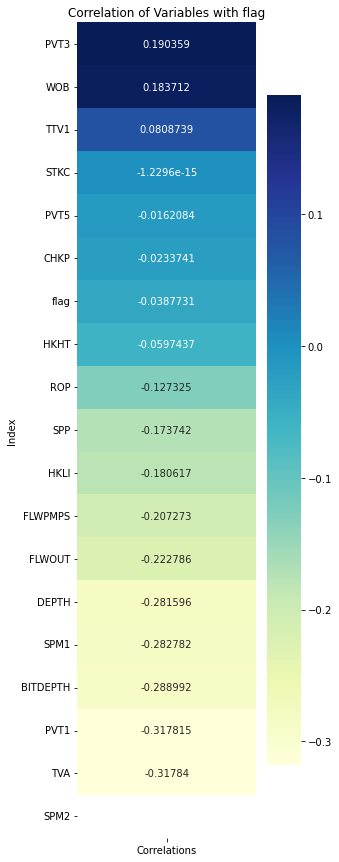

In [6]:
corr = data.corrwith(df['flag']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with flag")
plt.show()

In [7]:
sign = [    'BITDEPTH', 'CHKP', 'DEPTH', 'FLWOUT', 'FLWPMPS', 'HKHT', 'HKLI',  #49% max
            'PVT1','PVT3', #100% max № 4,36 ; 2,3
            'PVT5','ROP','SPM1', 'SPM2', 'SPP',  #49% max
            'STKC', #100% max № 4,20
            'TTV1', #49% max
            'TVA', #100% max № 5,6 26
            'WOB', #49% max
            'flag'
           ]

In [8]:
data_flag = data['flag']
data = data[sign]
print(data_flag.info(verbose=True))
print(data.info(verbose=True))

<class 'pandas.core.series.Series'>
RangeIndex: 7960876 entries, 0 to 7960875
Series name: flag
Non-Null Count    Dtype
--------------    -----
7960876 non-null  int64
dtypes: int64(1)
memory usage: 60.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960876 entries, 0 to 7960875
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   BITDEPTH  float64
 1   CHKP      float64
 2   DEPTH     float64
 3   FLWOUT    float64
 4   FLWPMPS   float64
 5   HKHT      float64
 6   HKLI      float64
 7   PVT1      float64
 8   PVT3      float64
 9   PVT5      float64
 10  ROP       float64
 11  SPM1      float64
 12  SPM2      float64
 13  SPP       float64
 14  STKC      float64
 15  TTV1      float64
 16  TVA       float64
 17  WOB       float64
 18  flag      int64  
dtypes: float64(18), int64(1)
memory usage: 1.1 GB
None


In [9]:
from sklearn.model_selection import train_test_split

sign_1 = [  'BITDEPTH', 'CHKP', 'DEPTH', 'FLWOUT', 'FLWPMPS', 'HKHT', 'HKLI',  #49% max
            'PVT1','PVT3', #100% max № 4,36 ; 2,3
            'PVT5','ROP','SPM1', 'SPM2', 'SPP',  #49% max
            'STKC', #100% max № 4,20
            'TTV1', #49% max
            'TVA', #100% max № 5,6 26
            'WOB' #49% max
           ]

inliers  = data[data.flag ==  0]
outliers = data[data.flag ==  1]

inliers  = inliers[sign_1]
outliers = outliers[sign_1]

inliers_train, inliers_test = train_test_split(inliers, test_size=0.30, random_state=42)

In [10]:
model = IsolationForest()
model.fit(inliers_train)
inlier_pred_test = model.predict(inliers_test)
outlier_pred = model.predict(outliers)

In [11]:
print("Accuracy in Detecting Legit Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.8982577155725544
Accuracy in Detecting Fraud Cases: 0.34287243093203185


In [12]:
data_train, data_test = train_test_split(data, test_size=0.30, random_state=42)
data_train_flag = data_train['flag']
data_test_flag  = data_test['flag']


#model = IsolationForest() #обучение на данных обычных дает низкие показатели точности на обоих зонах
#model.fit(data_train[sign_1])


out_pred = model.predict(data_test[sign_1])

In [13]:
Accur_Legit = 0
Accur_Fraud = 0

flags = data_test_flag.to_numpy()
tr_legit = list(flags).count(0)
tr_fraud = list(flags).count(1)

for i in range(0,len(data_test_flag)):
    if flags[i] == 0 and out_pred[i] == 1:
        Accur_Legit+=1
    if flags[i] == 1 and out_pred[i] == -1:
        Accur_Fraud+=1
Accur_Legit = float(Accur_Legit)/tr_legit
Accur_Fraud = float(Accur_Fraud)/tr_fraud

print("Accuracy in Detecting Legit Cases:", Accur_Legit)
print("Accuracy in Detecting Fraud Cases:", Accur_Fraud)

Accuracy in Detecting Legit Cases: 0.8985611166349525
Accuracy in Detecting Fraud Cases: 0.3423157418214926


In [14]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(flags,out_pred))

0.17553508520150493


In [ ]:
data_pred = model.predict(data)
print(data_pred)

In [ ]:
flags = data_flag.to_numpy()

In [ ]:
for i in range(0,len(flags)):
    if flags[i] == 0:
        flags[i] = 1
    else:
        flags[i] = -1

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(flags,data_pred))

In [ ]:
count_fraud_tr = 0
count_legit_tr = 0

count_legit_fraud_fl = 0
count_fraud_legit_fl = 0

for i in range(0,len(flags)):
    if flags[i] == 1 and data_pred[i] == flags[i]:
        count_legit_tr+=1
    if flags[i] == -1 and data_pred[i] == flags[i]:
        count_fraud_tr+=1
    if flags[i] == 1 and data_pred[i] != flags[i]:
        count_legit_fraud_fl+=1
    if flags[i] == -1 and data_pred[i] != flags[i]:
        count_fraud_legit_fl+=1

print(len(flags))
print(count_legit_tr)
print(count_fraud_tr)
print(count_legit_fraud_fl)
print(count_fraud_legit_fl)

In [ ]:
TP = count_legit_tr
TF = count_fraud_tr

FP = count_legit_fraud_fl
FN = count_fraud_legit_fl

Accuracy = float(TP+TF)/len(flags)
print(Accuracy)

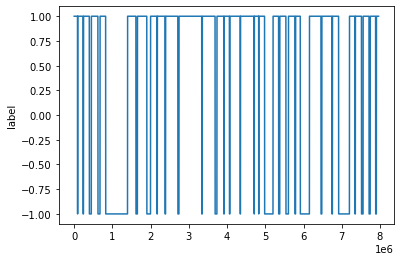

In [17]:
import matplotlib.pyplot as plt
plt.plot(flags)
plt.ylabel('label')
plt.show()

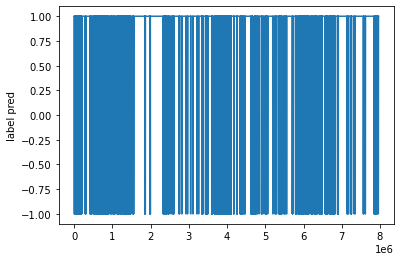

In [18]:
plt.plot(data_pred)
plt.ylabel('label pred')
plt.show()